<a href="https://colab.research.google.com/github/Euan-J-Austin/Analytics_and_Intelligence/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest is an Ensemble Learning Algorithm


Ensemble (parts making a whole) is a plurality of models predicting output

RF is a combination of decision tree models

RF can be used for regression and classification problems

#How do Decision Trees work?

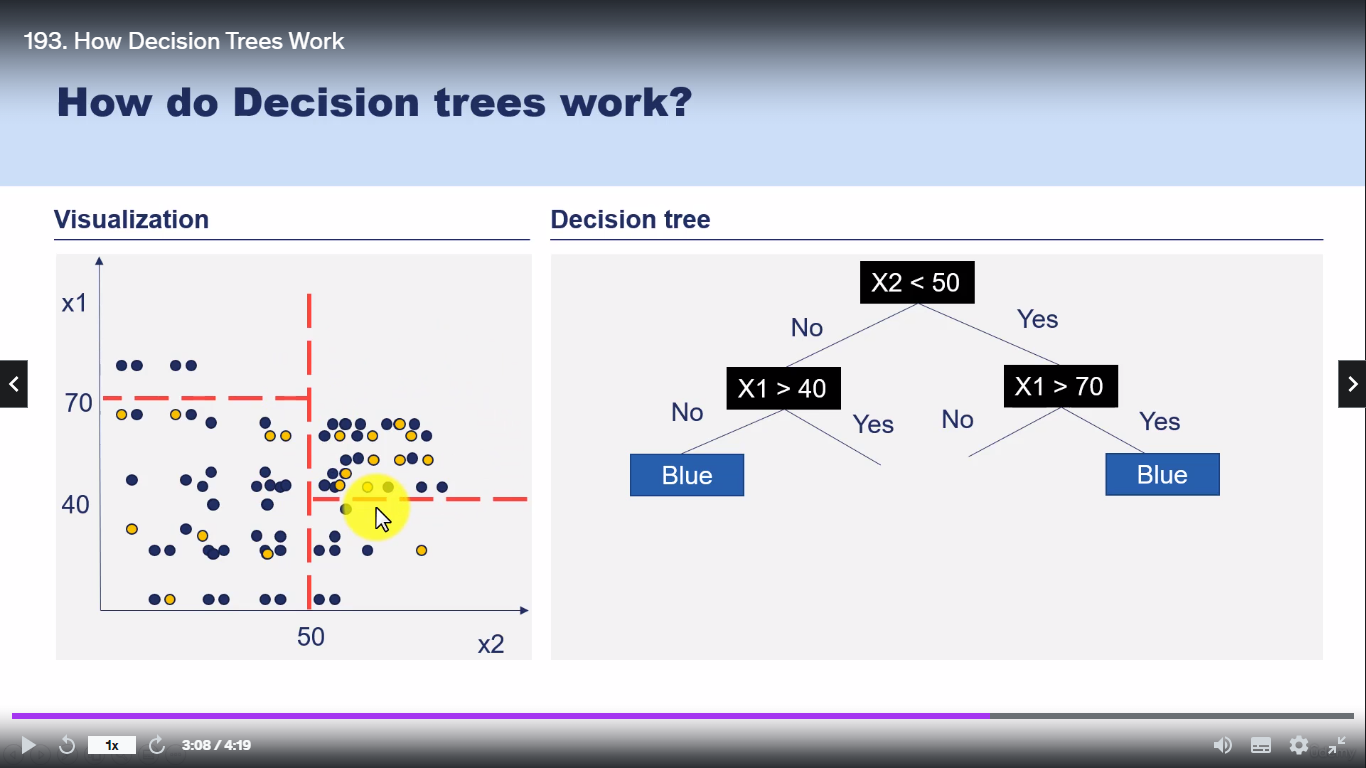

A split/leaf is made for maximum entropy logic (yeild most information)

Prediction based on relative frequency

Overfitting!

# Credit Card Applicants

1. Metric of success is acceptance/not acceptred
2. predict acceptance
3. generate insights

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/content/CreditCard (1).csv")
df.describe()

,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967
std,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812
min,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000
50%,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000
75%,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000
max,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


In [3]:
df.dropna()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,yes,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19
1315,no,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5
1316,yes,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2
1317,yes,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7


In [4]:
df = df.loc[df['age'] >= 18]
df.describe()

,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000
mean,0.458079,33.387386,3.367257,0.068636,184.970390,0.993902,55.182927,0.817835,6.999238
std,1.348416,9.884200,1.697377,0.094787,272.714742,1.247408,66.254140,0.386127,6.314718
min,0.000000,18.166670,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.237125,0.002208,4.583333,0.000000,12.000000,1.000000,2.000000
50%,0.000000,31.291665,2.900000,0.038775,101.231650,1.000000,30.000000,1.000000,6.000000
75%,0.000000,39.416670,4.000000,0.093516,248.970800,2.000000,72.000000,1.000000,11.000000
max,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


In [5]:
df = pd.get_dummies(data = df,
                    drop_first = True)

In [6]:
df.head(3)

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes
0,0,37.66667,4.52,0.033270,124.983300,3,54,1,12,1,1,0
1,0,33.25000,2.42,0.005217,9.854167,3,34,1,13,1,0,0
2,0,33.66667,4.50,0.004156,15.000000,4,58,1,5,1,1,0


In [7]:
df.describe()

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes
count,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000
mean,0.458079,33.387386,3.367257,0.068636,184.970390,0.993902,55.182927,0.817835,6.999238,0.775152,0.441311,0.069360
std,1.348416,9.884200,1.697377,0.094787,272.714742,1.247408,66.254140,0.386127,6.314718,0.417641,0.496733,0.254162
min,0.000000,18.166670,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.237125,0.002208,4.583333,0.000000,12.000000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,0.000000,31.291665,2.900000,0.038775,101.231650,1.000000,30.000000,1.000000,6.000000,1.000000,0.000000,0.000000
75%,0.000000,39.416670,4.000000,0.093516,248.970800,2.000000,72.000000,1.000000,11.000000,1.000000,1.000000,0.000000
max,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000,1.000000,1.000000,1.000000



## RF Quirks

1. Tendency to overfit -- bagging, subspaces?
2. Good with multi-colinearity
3. Good with non-linearity
4. Robust to outliers (averaged out)

#Isolate X and Y

In [8]:
y = df.card_yes
X = df.drop(columns = "card_yes")
X.head()

,reports,age,income,share,expenditure,dependents,months,majorcards,active,owner_yes,selfemp_yes
0,0,37.66667,4.5200,0.033270,124.983300,3,54,1,12,1,0
1,0,33.25000,2.4200,0.005217,9.854167,3,34,1,13,0,0
2,0,33.66667,4.5000,0.004156,15.000000,4,58,1,5,1,0
3,0,30.50000,2.5400,0.065214,137.869200,0,25,1,7,0,0
4,0,32.16667,9.7867,0.067051,546.503300,2,64,1,5,1,0


# Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1502,
                                                    stratify = y)

Our data is not balanced e.g. 78% were accepted for a card, 22% not ... stratify ensures balanced splot between test and training

# Random Forest Model

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [15]:
model = RandomForestClassifier(n_estimators = 300,
                               random_state = 1502)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=1502)

# Predictions

In [16]:
predictions = model.predict(X_test)
predictions[:5]

array([0, 1, 1, 1, 1], dtype=uint8)

# Classification report and F1 score

In [ ]:
Four main KPIs ...
1. Sensitivity
2. Specificity
3. Accuracy
4. F1-score .. useful for when data not balanced

Our dataset not baalanced so focus on F!-score

In [20]:
#Model Assessment
from sklearn.metrics import classification_report, f1_score

SyntaxError: ignored

In [22]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        59
           1       1.00      0.98      0.99       204

    accuracy                           0.98       263
   macro avg       0.97      0.99      0.98       263
weighted avg       0.99      0.98      0.98       263



F1-score of 96 suggests thart 97 and 99% of the answers are correct



In [23]:
#F1 score
f1_score(y_test, predictions)

0.99009900990099